In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
choice = 0  #start from 0
devices = ['nfet_03v3', 'pfet_03v3']

# widths used for characterization
w = np.array([5.0, 5.0, 5.0, 5.0])

In [12]:
# read ngspice data
df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')
par_names = df_raw.columns.to_list()
fet_name = par_names[1].split('[')[0]

# remove unwanted columns and rename for readability
df = df_raw.drop(['frequency', 'frequency.1'], axis=1)
df = df.apply(pd.to_numeric)
df.columns = df.columns.str.replace(fet_name, '')
df.columns = df.columns.str.replace(fet_name[1:], '')
df.columns = df.columns.str.replace('[dc]', '')
df.columns = df.columns.str.replace('onoise..', 'n')
df.columns = df.columns.str.removeprefix('@')
df.columns = df.columns.str.removeprefix('[')
df.columns = df.columns.str.removesuffix(']')
df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7256/3721318769.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_raw = pd.read_csv('./simulation/techsweep_'+devices[choice]+'.txt', sep='\s+')


,capbd,capbs,cdd,cgb,cgd,cgdo,cgg,cgs,cgso,css,...,gm,gmbs,id,l,vth,vb,vd,vg,n1overf,nid
0,4.715000e-15,4.715000e-15,1.575000e-16,-1.782000e-15,-1.510000e-16,9.372000e-16,1.847000e-15,8.634000e-17,9.372000e-16,-2.926000e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e-07,0.6587,0.0,0.000,0.0,0.000000e+00,3.828000e-16
1,4.408000e-15,4.408000e-15,1.025000e-16,-1.608000e-15,-9.877000e-17,9.372000e-16,1.651000e-15,5.567000e-17,9.372000e-16,-1.997000e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e-07,0.7005,-0.2,0.000,0.0,0.000000e+00,1.707000e-16
2,4.177000e-15,4.177000e-15,6.983000e-17,-1.476000e-15,-6.759000e-17,9.372000e-16,1.506000e-15,3.750000e-17,9.372000e-16,-1.392000e-17,...,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e-07,0.7371,-0.4,0.000,0.0,0.000000e+00,8.358000e-17
3,4.671000e-15,4.715000e-15,2.462000e-17,-1.785000e-15,-2.183000e-17,9.273000e-16,1.835000e-15,-2.806000e-17,9.372000e-16,3.238000e-17,...,3.520000e-12,1.085000e-12,1.261000e-13,2.800000e-07,0.6582,0.0,0.025,0.0,3.013000e-17,3.358000e-16
4,4.376000e-15,4.408000e-15,1.557000e-17,-1.610000e-15,-1.382000e-17,9.273000e-16,1.644000e-15,-1.986000e-17,9.372000e-16,2.047000e-17,...,7.223000e-13,1.901000e-13,2.518000e-14,2.800000e-07,0.7000,-0.2,0.025,0.0,6.152000e-18,1.499000e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636799,2.924000e-15,4.408000e-15,1.320000e-17,6.863000e-16,-1.131000e-17,9.462000e-16,4.569000e-14,-4.637000e-14,1.000000e-15,3.272000e-14,...,3.080000e-04,1.414000e-04,5.048000e-04,3.000000e-06,0.7375,-0.2,3.275,3.3,2.913000e-09,2.286000e-12
636800,2.888000e-15,4.177000e-15,1.273000e-17,6.287000e-17,-1.120000e-17,9.462000e-16,4.531000e-14,-4.536000e-14,1.000000e-15,3.196000e-14,...,2.982000e-04,1.235000e-04,4.784000e-04,3.000000e-06,0.8071,-0.4,3.275,3.3,2.796000e-09,2.247000e-12
636801,2.957000e-15,4.714000e-15,1.300000e-17,1.667000e-15,-1.079000e-17,9.372000e-16,4.615000e-14,-4.781000e-14,1.000000e-15,3.371000e-14,...,3.204000e-04,1.660000e-04,5.354000e-04,3.000000e-06,0.6612,0.0,3.300,3.3,3.052000e-09,2.328000e-12
636802,2.919000e-15,4.408000e-15,1.265000e-17,6.862000e-16,-1.083000e-17,9.372000e-16,4.569000e-14,-4.637000e-14,1.000000e-15,3.272000e-14,...,3.080000e-04,1.414000e-04,5.048000e-04,3.000000e-06,0.7375,-0.2,3.300,3.3,2.914000e-09,2.286000e-12


In [13]:
# sweep variable vectors
l =   np.unique(df['l'])
vgs = np.unique(df['vg'])
vds = np.unique(df['vd'])
vsb = np.unique(-df['vb'])

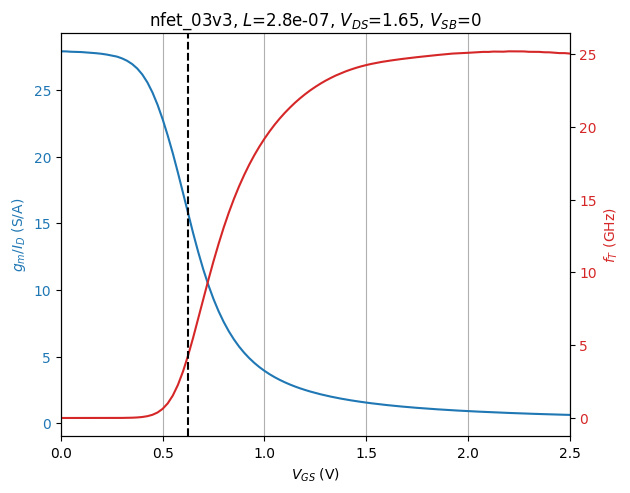

In [14]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=max(vds/2); VSB1=0
df1 = df.loc[(df['l'] == L1) & (df['vd'] == VDS1)& (df['vb'] == -VSB1)]
gm_id1 = df1['gm'].values/df1['id'].values
cgg1 = df1['cgg'].values + df1['cgdo'].values + df1['cgso'].values
ft1 = df1['gm'].values/cgg1/2/np.pi

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.xlim(0, 2.5)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\c'
<>:5: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_7256/835228120.py:5: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')


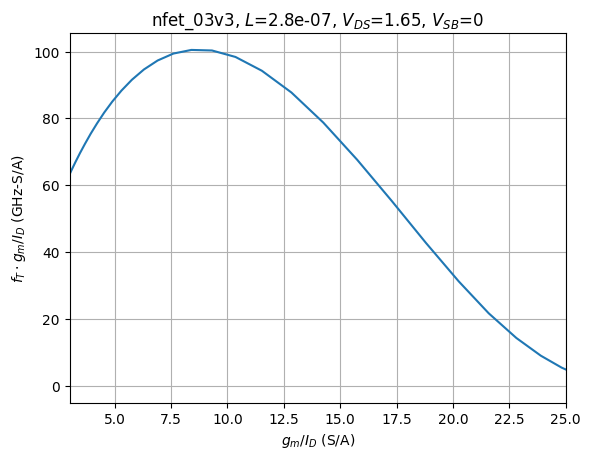

In [15]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\cdot g_m/I_D$ (GHz-S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

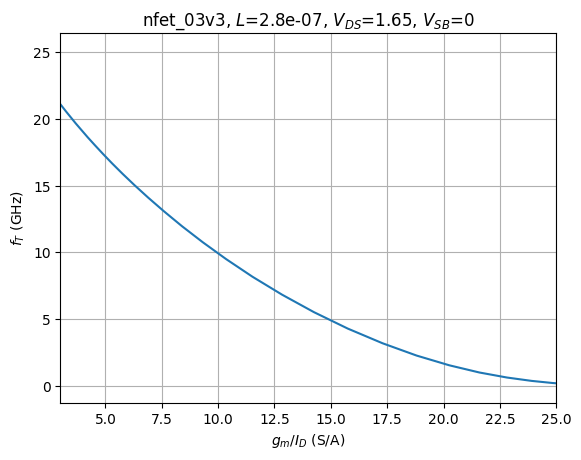

In [16]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

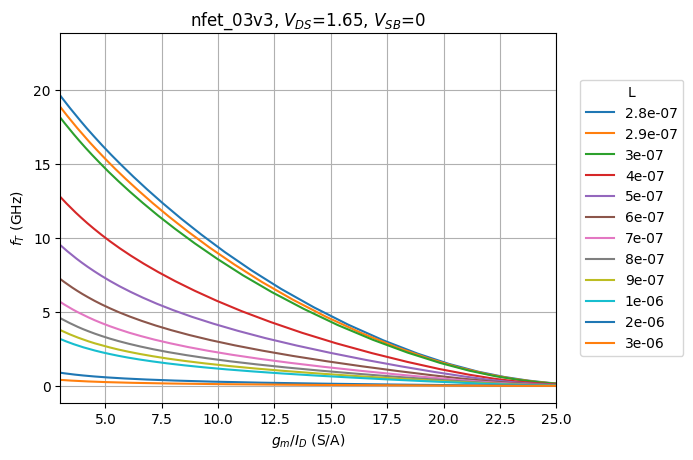

In [17]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
df2 = df.loc[ (df['vd'] == VDS2) & (df['vb'] == -VSB2)]
df2
gm_id2 = df2['gm'].values/df2['id'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
cgg2 = df2['cgg'].values + df2['cgdo'].values + df2['cgso'].values
ft2 = df2['gm'].values/cgg2/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

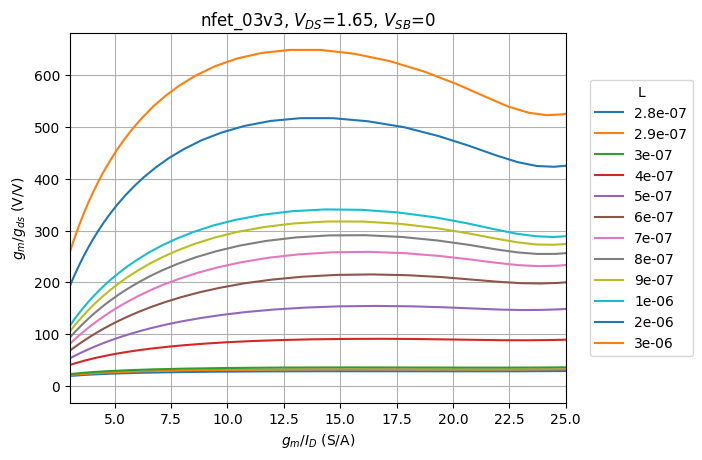

In [18]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 25)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.grid()
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7256/417937471.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')


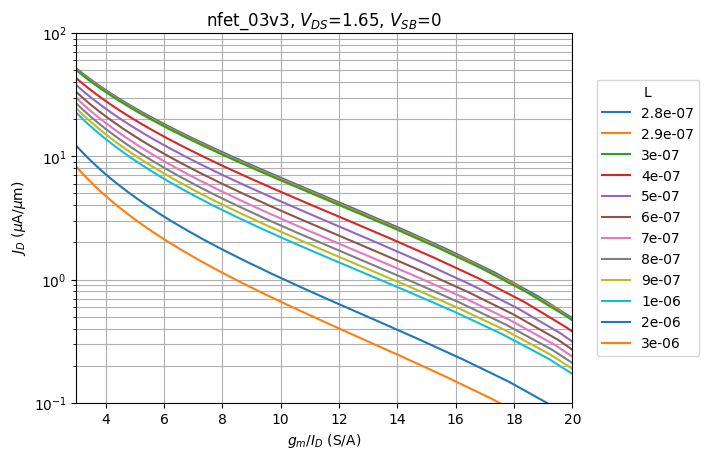

In [19]:
# plot jd versus gm/ID for all L
jd2 = df2['id'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(1e-1, 1e2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\g'
<>:11: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_7256/2143781462.py:11: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Thermal noise $\gamma$ factor')


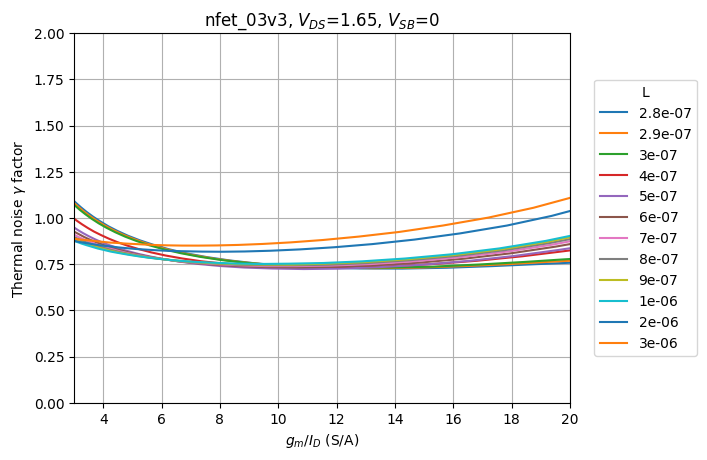

In [20]:
# plot gamma versus gm/ID for all L
gamma = df2['nid'].values**2 / df2['gm'].values/4/300/1.38e-23
gamma = np.reshape(gamma, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gamma)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_7256/592371629.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')


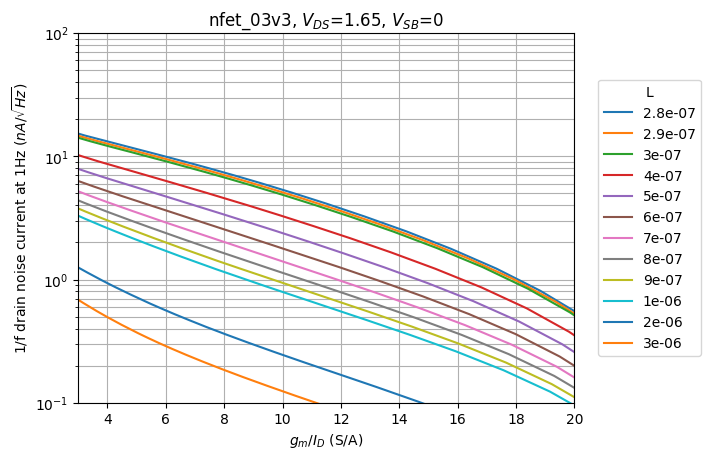

In [21]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
n1overf = df2['n1overf'].values
n1overf = np.reshape(n1overf, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_7256/2654457752.py:11: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')


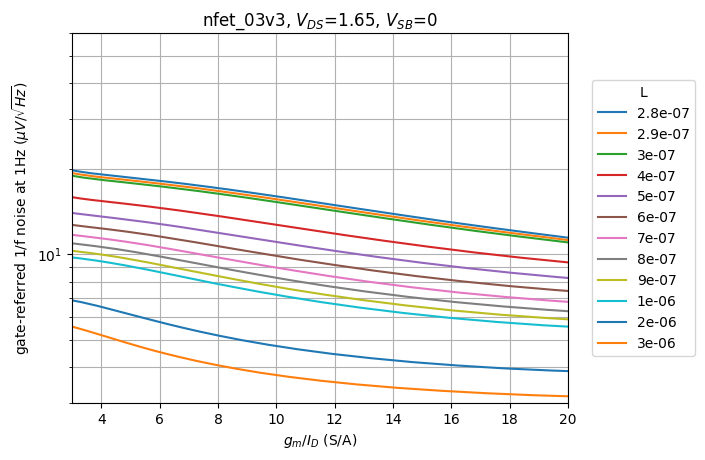

In [22]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
n1overf_gate = df2['n1overf'].values / df2['gm'].values
n1overf_gate = np.reshape(n1overf_gate, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, n1overf_gate/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\mu V/ \sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+', $V_{SB}$='+str(VSB1))
plt.show()